In [111]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [113]:
df=pd.read_csv(r'C:\Users\Tony\Downloads\daily_dataset\summary\weekly_dataset_summary.csv')

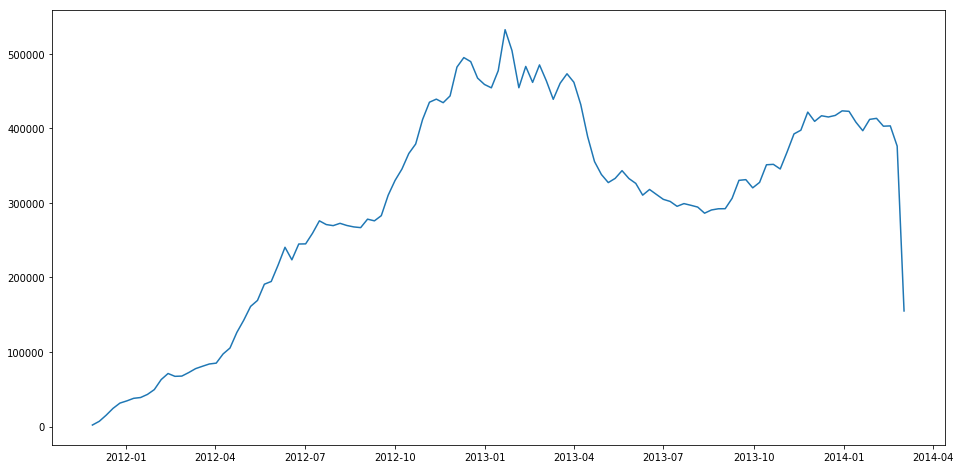

In [114]:
#setting index as date
df['week'] = pd.to_datetime(df.week,format='%Y-%m-%d')
df.index = df['week']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['total_consumption'], label='total_consumption')

In [115]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['week', 'total_consumption'])

for i in range(0,len(data)):
    new_data['week'][i] = data['week'][i]
    new_data['total_consumption'][i] = data['total_consumption'][i]

In [116]:
new_data.index = new_data.week
new_data.drop('week', axis=1, inplace=True)

In [117]:
dataset = new_data.values
dataset

array([[1974.3349999999994],
       [6978.282002300009],
       [15169.185000799998],
       [24337.98199890001],
       [31414.955995899967],
       [34365.500996699986],
       [37837.458001599975],
       [38889.8749935],
       [43058.148993899886],
       [49521.58599780002],
       [62976.70498949987],
       [71132.18500659995],
       [67331.63599970014],
       [67671.66499839988],
       [72377.12799280013],
       [77660.64799809996],
       [80847.37599540014],
       [83908.90699999988],
       [85051.42299769999],
       [97378.87400649962],
       [105318.59500430053],
       [126270.9129969001],
       [142637.90300359981],
       [161197.07299450028],
       [169224.74700229973],
       [190974.9689973012],
       [194662.9799981007],
       [216722.35799349792],
       [240545.24800739798],
       [223721.58999310125],
       [244930.41799740164],
       [245122.1649978],
       [259346.47898669943],
       [276042.3069882009],
       [271040.6220022986],
       [2696

In [118]:
train = dataset[0:100,:]
valid = dataset[100:,:]


In [119]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = scaler.fit_transform(dataset)
scaled_data = scaler.fit_transform(train)
scaled_data[0:70,0]

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([0.        , 0.00943032, 0.02486671, 0.04214601, 0.05548311,
       0.06104364, 0.06758681, 0.06957017, 0.0774256 , 0.08960645,
       0.11496365, 0.13033328, 0.12317085, 0.12381166, 0.13267947,
       0.14263667, 0.1486423 , 0.15441199, 0.15656515, 0.17979718,
       0.1947602 , 0.23424645, 0.2650913 , 0.30006748, 0.31519625,
       0.35618621, 0.36313655, 0.40470914, 0.44960521, 0.41789973,
       0.4578694 , 0.45823076, 0.48503757, 0.51650214, 0.50707608,
       0.50436229, 0.51021801, 0.5047021 , 0.50113321, 0.49930324,
       0.52073579, 0.51648517, 0.52957485, 0.58128815, 0.61865056,
       0.64744052, 0.68681809, 0.71090031, 0.77264856, 0.81651917,
       0.82433913, 0.8153594 , 0.83249176, 0.90537441, 0.92944817,
       0.9192307 , 0.87754572, 0.86145161, 0.85296089, 0.89620931,
       1.        , 0.94709647, 0.85315591, 0.90705278, 0.86671287,
       0.9109227 , 0.87055252, 0.82387844, 0.86450355, 0.88847781])

In [120]:
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [121]:
x_train.shape

(70, 30)

In [122]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [123]:
x_train.shape

(70, 30, 1)

In [68]:
# # create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(units=240, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(Dropout(.2))
# model.add(LSTM(units=120,return_sequences=True))
# model.add(Dropout(.2))
# model.add(LSTM(units=50))
# model.add(Dropout(.2))

# model.add(Dense(1))


In [69]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=10))
model.add(Dense(1))


In [72]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=60, batch_size=10, verbose=2)


Epoch 1/60
 - 6s - loss: 0.0073
Epoch 2/60
 - 1s - loss: 0.0076
Epoch 3/60
 - 1s - loss: 0.0070
Epoch 4/60
 - 0s - loss: 0.0065
Epoch 5/60
 - 0s - loss: 0.0060
Epoch 6/60
 - 0s - loss: 0.0055
Epoch 7/60
 - 0s - loss: 0.0050
Epoch 8/60
 - 0s - loss: 0.0048
Epoch 9/60
 - 0s - loss: 0.0044
Epoch 10/60
 - 0s - loss: 0.0042
Epoch 11/60
 - 0s - loss: 0.0038
Epoch 12/60
 - 0s - loss: 0.0036
Epoch 13/60
 - 0s - loss: 0.0034
Epoch 14/60
 - 0s - loss: 0.0034
Epoch 15/60
 - 0s - loss: 0.0033
Epoch 16/60
 - 0s - loss: 0.0039
Epoch 17/60
 - 0s - loss: 0.0040
Epoch 18/60
 - 0s - loss: 0.0036
Epoch 19/60
 - 0s - loss: 0.0031
Epoch 20/60
 - 0s - loss: 0.0036
Epoch 21/60
 - 0s - loss: 0.0029
Epoch 22/60
 - 0s - loss: 0.0028
Epoch 23/60
 - 0s - loss: 0.0027
Epoch 24/60
 - 0s - loss: 0.0026
Epoch 25/60
 - 0s - loss: 0.0026
Epoch 26/60
 - 0s - loss: 0.0027
Epoch 27/60
 - 0s - loss: 0.0026
Epoch 28/60
 - 0s - loss: 0.0025
Epoch 29/60
 - 0s - loss: 0.0024
Epoch 30/60
 - 0s - loss: 0.0027
Epoch 31/60
 - 0s -

In [73]:

inputs = new_data[len(new_data) - len(valid) - 30:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [74]:
inputs.shape[0]

49

In [75]:
X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
    

X_test = np.array(X_test)



In [76]:
X_test

array([[0.86696883, 0.81057322, 0.72952609, 0.66639909, 0.63372621,
        0.61324776, 0.62383967, 0.64345382, 0.62351442, 0.61115139,
        0.58146443, 0.59581746, 0.58325879, 0.57087746, 0.56555018,
        0.55322043, 0.5600747 , 0.55587499, 0.55130324, 0.53583069,
        0.5439756 , 0.54698985, 0.54720389, 0.57337859, 0.61896199,
        0.62067536, 0.59996287, 0.61378362, 0.65831407, 0.65940324],
       [0.81057322, 0.72952609, 0.66639909, 0.63372621, 0.61324776,
        0.62383967, 0.64345382, 0.62351442, 0.61115139, 0.58146443,
        0.59581746, 0.58325879, 0.57087746, 0.56555018, 0.55322043,
        0.5600747 , 0.55587499, 0.55130324, 0.53583069, 0.5439756 ,
        0.54698985, 0.54720389, 0.57337859, 0.61896199, 0.62067536,
        0.59996287, 0.61378362, 0.65831407, 0.65940324, 0.64767094],
       [0.72952609, 0.66639909, 0.63372621, 0.61324776, 0.62383967,
        0.64345382, 0.62351442, 0.61115139, 0.58146443, 0.59581746,
        0.58325879, 0.57087746, 0.56555018, 0.

In [77]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
energySum = model.predict(X_test)
energySum = scaler.inverse_transform(energySum)

In [78]:
# energySum = model.predict(X_test)
# energySum = scaler.inverse_transform(energySum)

In [79]:
# rms=np.sqrt(np.mean(np.power((valid-energySum),2)))

In [80]:
# rms

C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,'Time')

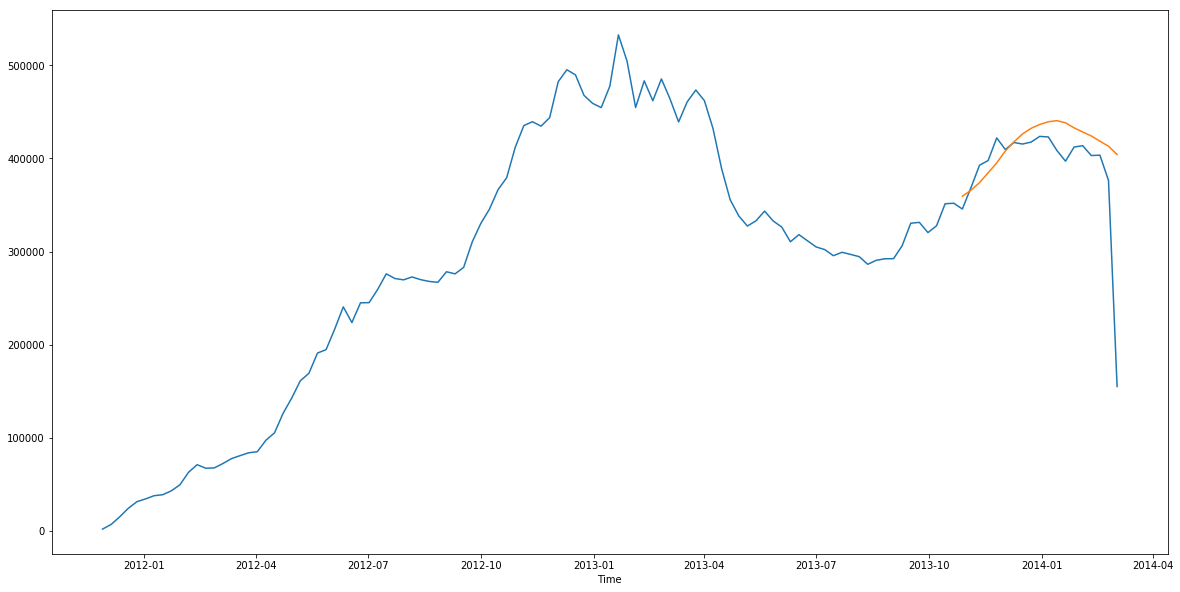

In [83]:
train = new_data[:100]
valid = new_data[100:]
valid['Predictions'] = energySum
#plt.plot(train['total_consumption'])
plt.plot(new_data['total_consumption'])
#plt.plot(valid[['total_consumption','Predictions']])
plt.plot(valid[['Predictions']])
plt.xlabel("Time")